In [1]:
import pandas as pd

In [13]:
df=pd.read_csv("Downloads/a4Data1.csv")
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A4,1,1,True,0.022801
1,A4,2,1,True,0.025245
2,A4,3,1,True,0.021145
3,A4,4,1,True,0.027019
4,A4,5,1,True,0.027596
...,...,...,...,...,...
4350,A4,21,261,False,1.069055
4351,A4,22,261,False,3.991784
4352,A4,23,261,False,0.319040
4353,A4,24,261,False,0.156832


In [14]:
Agent = df['AGENT'].iat[0]
Agent

'A4'

In [19]:
DF=df["NO OF GHOSTS"].value_counts().to_frame().sort_index()
DF = DF.rename({'NO OF GHOSTS':'COUNT'}, axis=1)
DF.reset_index(inplace=True)
DF = DF.rename(columns = {'index':'NO OF GHOSTS'})
DF

,NO OF GHOSTS,COUNT
0,1,30
1,2,30
2,3,30
3,4,30
4,5,30
...,...,...
149,241,25
150,246,25
151,251,25
152,256,25


In [20]:
DF.columns

Index(['NO OF GHOSTS', 'COUNT'], dtype='object')

In [21]:
DF1 = pd.merge(df,DF,on ='NO OF GHOSTS',how ='left')
DF1

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME,COUNT
0,A4,1,1,True,0.022801,30
1,A4,2,1,True,0.025245,30
2,A4,3,1,True,0.021145,30
3,A4,4,1,True,0.027019,30
4,A4,5,1,True,0.027596,30
...,...,...,...,...,...,...
4350,A4,21,261,False,1.069055,25
4351,A4,22,261,False,3.991784,25
4352,A4,23,261,False,0.319040,25
4353,A4,24,261,False,0.156832,25


In [22]:
NOFT= df.groupby(["NO OF GHOSTS", "RESULT"]).size().to_frame()
NOFT

0
NO OF GHOSTS RESULT    
1            True    30
2            True    30
3            False    1
             True    29
4            True    30
...                  ..
246          True     1
251          False   24
             True     1
256          False   25
261          False   25

[286 rows x 1 columns]

In [23]:
NOFT.reset_index(inplace=True)
NOFT = NOFT.rename({0:'SUCCESSCOUNT'}, axis=1)
NOFT

,NO OF GHOSTS,RESULT,SUCCESSCOUNT
0,1,True,30
1,2,True,30
2,3,False,1
3,3,True,29
4,4,True,30
...,...,...,...
281,246,True,1
282,251,False,24
283,251,True,1
284,256,False,25


In [24]:
FinalDf=pd.merge(NOFT, 
                      DF, 
                      on =['NO OF GHOSTS'], 
                      how ='left')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT
0,1,True,30,30
1,2,True,30,30
2,3,False,1,30
3,3,True,29,30
4,4,True,30,30
...,...,...,...,...
281,246,True,1,25
282,251,False,24,25
283,251,True,1,25
284,256,False,25,25


In [25]:
FinalDf["Surv"]=FinalDf["SUCCESSCOUNT"]/FinalDf["COUNT"]
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
0,1,True,30,30,1.000000
1,2,True,30,30,1.000000
2,3,False,1,30,0.033333
3,3,True,29,30,0.966667
4,4,True,30,30,1.000000
...,...,...,...,...,...
281,246,True,1,25,0.040000
282,251,False,24,25,0.960000
283,251,True,1,25,0.040000
284,256,False,25,25,1.000000


In [26]:
FinalDf=FinalDf.query('RESULT != False')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
0,1,True,30,30,1.000000
1,2,True,30,30,1.000000
3,3,True,29,30,0.966667
4,4,True,30,30,1.000000
5,5,True,30,30,1.000000
...,...,...,...,...,...
273,221,True,3,25,0.120000
275,226,True,2,25,0.080000
279,241,True,1,25,0.040000
281,246,True,1,25,0.040000


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 1.0)

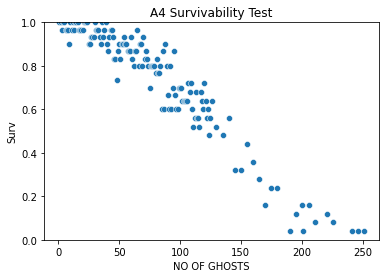

In [39]:
graph=sns.scatterplot(x="NO OF GHOSTS", y="Surv", data=FinalDf).set(title=Agent+" Survivability Test")
plt.ylim(0, 1)

In [32]:
Timedf=df.groupby(["NO OF GHOSTS","RESULT"], as_index=False)['TIME'].mean()
Timedf=Timedf.query('RESULT != False')
Timedf

,NO OF GHOSTS,RESULT,TIME
0,1,True,0.025186
1,2,True,0.031464
3,3,True,0.032132
4,4,True,0.038013
5,5,True,0.038108
...,...,...,...
273,221,True,9.851067
275,226,True,8.014395
279,241,True,5.634423
281,246,True,6.903362


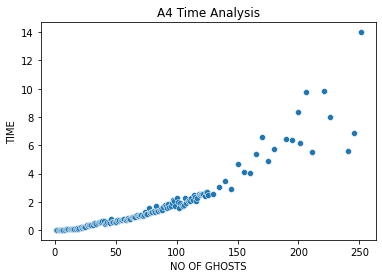

In [41]:
graphtime=sns.scatterplot(x="NO OF GHOSTS", y="TIME", data=Timedf).set(title=Agent+" Time Analysis")